# 載入相關套件

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np 
from keras.models import Sequential
from keras.layers import Input, Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 載入資料集

In [ ]:
X_train =  np.loadtxt('/PCA/PCA_DATA/x_train_1.txt')
X_test =  np.loadtxt('/PCA/PCA_DATA/x_test_1.txt')
Y_train = np.loadtxt('/PCA/PCA_DATA/y_train_1.txt')
Y_test  =  np.loadtxt('/PCA/PCA_DATA/y_test_1.txt')

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(220717, 76)
(73598, 76)
(220717,)
(73598,)


In [ ]:
feature_num = X_train.shape[1]
print(feature_num)

76


# 資料預處理(合併資料集)

In [ ]:
X = np.concatenate((X_train, X_test), axis = 0)
Y = np.concatenate((Y_train, Y_test), axis = 0)
print(X.shape)
print(Y.shape)

(294315, 76)
(294315,)


In [ ]:
print('the shape of Y',Y.shape)
Y = np.reshape(Y, (Y.size,1))
print('the reshape of Y', Y.shape)

the shape of Y (294315,)
the reshape of Y (294315, 1)


# 分割訓練和測試資料集


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print('訓練資料集 X:',X_train.shape)
print('訓練資料集 Y:',Y_train.shape)
print('測試資料集 X:',X_test.shape)
print('測試資料集 Y:',Y_test.shape)

訓練資料集 X: (206020, 76)
訓練資料集 Y: (206020, 1)
測試資料集 X: (88295, 76)
測試資料集 Y: (88295, 1)


# 模型建立

In [ ]:
model = Sequential()
InputLayer = Input( batch_input_shape=(None, feature_num ), name="dense_input", dtype=tf.float32, sparse=False, ragged=False)
model.add(InputLayer)
model.add(Dense(256, batch_input_shape=(None, feature_num ), name="dense", dtype=tf.float32, activation="relu"))
model.add(Dense(128, name="dense_1", dtype=tf.float32, activation="relu"))
model.add(Dense(39, name="dense_2", dtype=tf.float32, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9856      
                                                                 
 dense_2 (Dense)             (None, 39)                5031      
                                                                 
Total params: 14,887
Trainable params: 14,887
Non-trainable params: 0
_________________________________________________________________


# 模型訓練

In [ ]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512 , validation_split=0.05)

Epoch 1/1000
383/383 [==============================] - 2s 4ms/step - loss: 0.7570 - sparse_categorical_accuracy: 0.8485 - val_loss: 0.4567 - val_sparse_categorical_accuracy: 0.8845
Epoch 2/1000
383/383 [==============================] - 1s 4ms/step - loss: 0.4437 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.4123 - val_sparse_categorical_accuracy: 0.8900
Epoch 3/1000
383/383 [==============================] - 1s 4ms/step - loss: 0.4146 - sparse_categorical_accuracy: 0.8902 - val_loss: 0.3982 - val_sparse_categorical_accuracy: 0.8919
Epoch 4/1000
383/383 [==============================] - 2s 4ms/step - loss: 0.4003 - sparse_categorical_accuracy: 0.8919 - val_loss: 0.3828 - val_sparse_categorical_accuracy: 0.8952
Epoch 5/1000
383/383 [==============================] - 2s 4ms/step - loss: 0.3906 - sparse_categorical_accuracy: 0.8935 - val_loss: 0.3762 - val_sparse_categorical_accuracy: 0.8967
Epoch 6/1000
383/383 [==============================] - 1s 4ms/step - loss: 0.3831 - spars

# 圖形化訓練過程

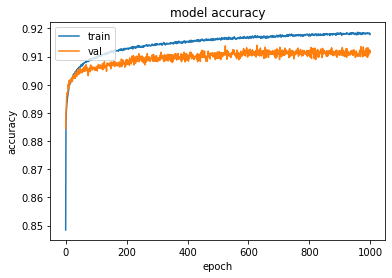

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

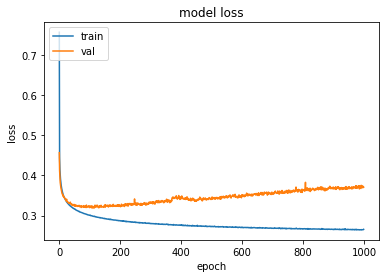

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 測試模型精準度

In [ ]:
model.evaluate(X_test, Y_test)

2760/2760 [==============================] - 4s 1ms/step - loss: 0.4125 - sparse_categorical_accuracy: 0.9053


[0.4125126600265503, 0.9053287506103516]

In [ ]:
y_pred = model.predict(X_test)
y_true = Y_test

In [ ]:
print("y_true's shape: ", y_true.shape)
print("y_pred's shape: ", y_pred.shape)

y_true's shape:  (88295, 1)
y_pred's shape:  (88295, 39)


In [ ]:
pred = np.argmax(y_pred, axis = 1)
pred = np.reshape(pred, (len(pred), 1))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

         0.0       0.50      0.34      0.41       343
         1.0       0.57      0.18      0.27       141
         2.0       0.39      0.34      0.36       338
         3.0       0.77      0.59      0.67        61
         4.0       0.76      0.94      0.84      8777
         5.0       0.62      0.57      0.59       292
         6.0       0.07      0.02      0.03       131
         7.0       0.18      0.12      0.15       139
         8.0       0.22      0.12      0.16       138
         9.0       0.17      0.11      0.13       373
        10.0       0.06      0.02      0.03        91
        11.0       0.42      0.39      0.40      1999
        12.0       0.56      0.23      0.33        96
        13.0       0.19      0.10      0.13       135
        14.0       0.17      0.05      0.07       168
        15.0       0.48      0.19      0.27       161
        16.0       0.27      0.10      0.14       276
        17.0       0.30    

# 製作混淆矩陣


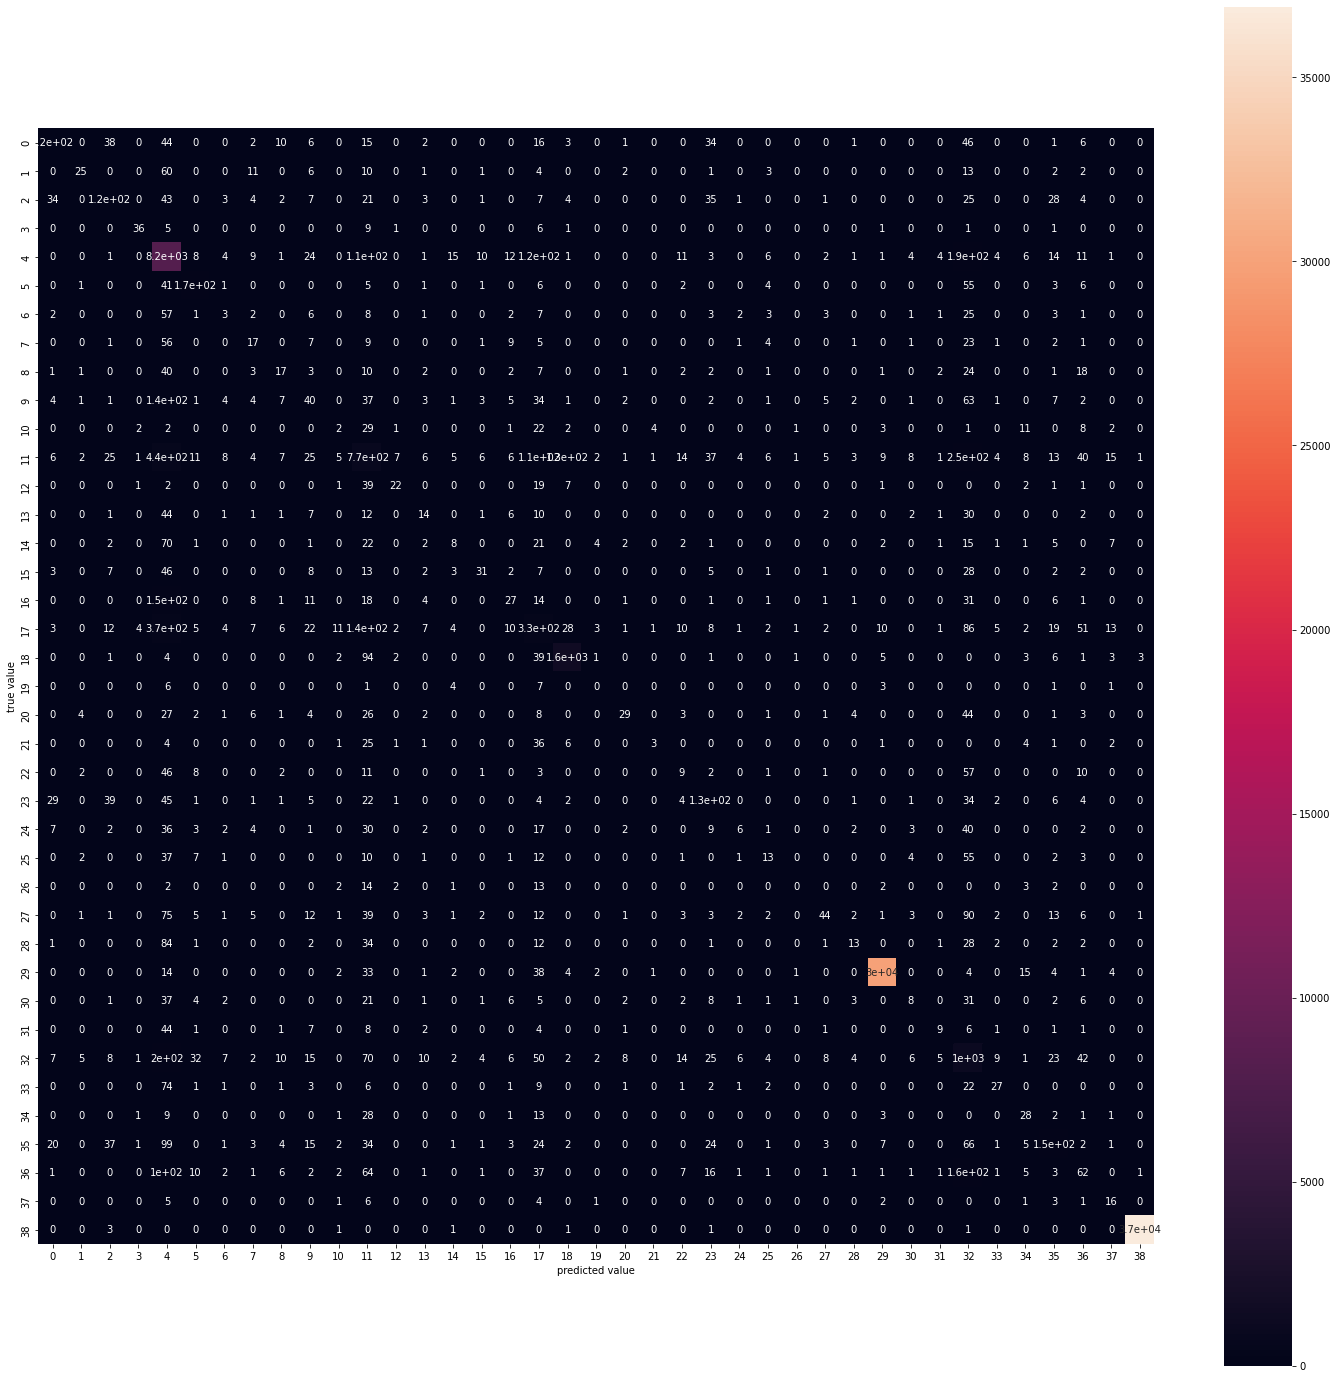

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(25, 25))
mat = confusion_matrix(y_true, pred)
sns.heatmap(mat,square= True, annot=True, cbar= True, ax=ax)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()